In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder ,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
warnings.filterwarnings('ignore')
df=pd.read_csv('C:\\Users\\manoj\\mlproject\\csvfile\\Customer Churn Prediction.csv')
data=pd.DataFrame(df, columns=df)
print(df.shape)

(7043, 21)


In [3]:
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [5]:
print(df.isna().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
TotalCharges = SimpleImputer(strategy='median')
df['TotalCharges'] = TotalCharges.fit_transform(df[['TotalCharges']])
print(df.isna().sum().sum())

0


In [7]:
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
new_order = ['InternetService'] + [col for col in df.columns if col != 'InternetService']
print(new_order)

['InternetService', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
pd.get_dummies(df,columns=['InternetService'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,False,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,True,False,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,False,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,False,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,True,False,False
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,False,True,False
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,True,False,False
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,False,True,False


In [11]:
label_encoder = LabelEncoder()
df['gender']=label_encoder.fit_transform(df['gender'])
df['PhoneService']=label_encoder.fit_transform(df['PhoneService'])
df['OnlineSecurity']=label_encoder.fit_transform(df['OnlineSecurity'])
df['Churn']=label_encoder.fit_transform(df['Churn'])
df['InternetService']=label_encoder.fit_transform(df['InternetService'])



In [12]:
X=df[['gender','SeniorCitizen','tenure','InternetService' ,'OnlineSecurity','PhoneService']]
Y=df[['Churn']]
print(X,Y)

      gender  SeniorCitizen  tenure  InternetService  OnlineSecurity  \
0          0              0       1                0               0   
1          1              0      34                0               2   
2          1              0       2                0               2   
3          1              0      45                0               2   
4          0              0       2                1               0   
...      ...            ...     ...              ...             ...   
7038       1              0      24                0               2   
7039       0              0      72                1               0   
7040       0              0      11                0               2   
7041       1              1       4                1               0   
7042       1              0      66                1               2   

      PhoneService  
0                0  
1                1  
2                1  
3                0  
4                1  
...      

<function matplotlib.pyplot.show(close=None, block=None)>

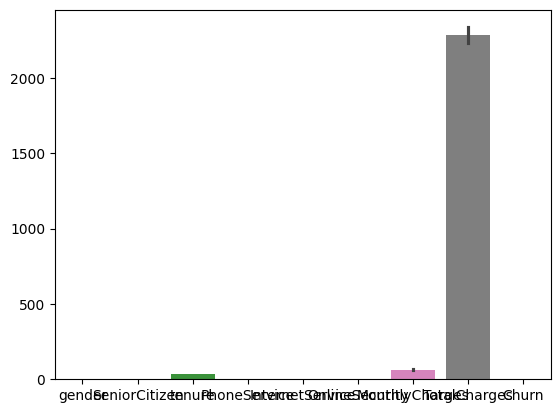

In [13]:
df.dtypes
sns.barplot(df)
plt.show

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X ,Y , test_size=0.3, random_state=42)
print("Train Set:", X_train,y_train)
print("Test Set:", X_test,y_test)

Train Set:       gender  SeniorCitizen  tenure  InternetService  OnlineSecurity  \
1695       1              0      54                0               0   
1095       1              0       1                1               0   
3889       1              0      13                2               1   
3667       0              1      24                1               0   
2902       0              1       6                1               2   
...      ...            ...     ...              ...             ...   
3772       1              0       1                1               2   
5191       0              0      23                0               2   
5226       1              0      12                2               1   
5390       1              1      12                1               0   
860        1              0      26                2               1   

      PhoneService  
1695             1  
1095             1  
3889             1  
3667             1  
2902             1 

In [15]:
print(df.dtypes)

customerID           object
gender                int64
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService       int64
OnlineSecurity        int64
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [16]:
X_train.shape

(4930, 6)

In [17]:
X_test.shape

(2113, 6)

In [18]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred=model.predict(X_test)


In [69]:
from sklearn.metrics import mean_absolute_error

In [70]:
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae}')

MAE: 0.3301318344741572
